# Banco de dados da Federal Election Commission em 2012

In [81]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series

- Carregando os dados

In [82]:
fec = pd.read_csv('datasets/fec/P00000001-ALL.csv', low_memory=False)
fec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001731 entries, 0 to 1001730
Data columns (total 16 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   cmte_id            1001731 non-null  object 
 1   cand_id            1001731 non-null  object 
 2   cand_nm            1001731 non-null  object 
 3   contbr_nm          1001731 non-null  object 
 4   contbr_city        1001712 non-null  object 
 5   contbr_st          1001727 non-null  object 
 6   contbr_zip         1001620 non-null  object 
 7   contbr_employer    988002 non-null   object 
 8   contbr_occupation  993301 non-null   object 
 9   contb_receipt_amt  1001731 non-null  float64
 10  contb_receipt_dt   1001731 non-null  object 
 11  receipt_desc       14166 non-null    object 
 12  memo_cd            92482 non-null    object 
 13  memo_text          97770 non-null    object 
 14  form_tp            1001731 non-null  object 
 15  file_num           1001731 non-n

In [83]:
fec.iloc[724563]

cmte_id                  C00495820
cand_id                  P80000748
cand_nm                  Paul, Ron
contbr_nm            PERRET, BLAKE
contbr_city          BEVERLY HILLS
contbr_st                       CA
contbr_zip                   90210
contbr_employer             MYSELF
contbr_occupation           ARTIST
contb_receipt_amt            100.0
contb_receipt_dt         15-APR-12
receipt_desc                   NaN
memo_cd                        NaN
memo_text                      NaN
form_tp                      SA17A
file_num                    785522
Name: 724563, dtype: object

- Obtendo o nome de todos os candidatos políticos

In [84]:
unique_cands = fec.cand_nm.unique()
unique_cands

array(['Bachmann, Michelle', 'Romney, Mitt', 'Obama, Barack',
       "Roemer, Charles E. 'Buddy' III", 'Pawlenty, Timothy',
       'Johnson, Gary Earl', 'Paul, Ron', 'Santorum, Rick',
       'Cain, Herman', 'Gingrich, Newt', 'McCotter, Thaddeus G',
       'Huntsman, Jon', 'Perry, Rick'], dtype=object)

- Número de contribuições por partido

In [85]:
parties = {"Bachmann, Michelle": "Republican",
           "Cain, Herman": "Republican",
           "Gingrich, Newt": "Republican",
           "Huntsman, Jon": "Republican",
           "Johnson, Gary Earl": "Republican",
           "McCotter, Thaddeus G": "Republican",
           "Obama, Barack": "Democrat",
           "Paul, Ron": "Republican",
           "Pawlenty, Timothy": "Republican",
           "Perry, Rick": "Republican",
           "Roemer, Charles E. 'Buddy' III": "Republican",
           "Romney, Mitt": "Republican",
           "Santorum, Rick": "Republican"}

fec['party'] = fec.cand_nm.map(parties)
fec['party'].value_counts()

party
Democrat      593746
Republican    407985
Name: count, dtype: int64

In [86]:
fec = fec[fec.contb_receipt_amt > 0] #conjunto de dados com as contribuições positivas
# subconjunto com as contribuições dos dois principais candidatos das elições de 2012
fec_mrbo = fec[fec.cand_nm.isin(['Obama, Barack', 'Romney, Mitt'])]

- Estatísticas sobre as doações de acordo com a profissão e o empregador

In [87]:
fec.contbr_occupation.value_counts()[:15]

contbr_occupation
RETIRED                                   233990
INFORMATION REQUESTED                      35107
ATTORNEY                                   34286
HOMEMAKER                                  29931
PHYSICIAN                                  23432
INFORMATION REQUESTED PER BEST EFFORTS     21138
ENGINEER                                   14334
TEACHER                                    13990
CONSULTANT                                 13273
PROFESSOR                                  12555
NOT EMPLOYED                                9828
SALES                                       8333
LAWYER                                      8283
MANAGER                                     8024
PRESIDENT                                   7758
Name: count, dtype: int64

In [88]:
occ_mapping = {'INFORMATION REQUESTED': 'NOT PROVIDED',
               'INFORMATION REQUESTED PER BEST EFFORTS': 'NOT PRIVIDED',
               'INFORMATION REQUESTED (BEST EFFORTS)': 'NOT PRIVIDED',
               'C.E.O': 'CEO'}

f = lambda x: occ_mapping.get(x, x) 
fec.contbr_occupation = fec.contbr_occupation.map(f)

emp_mapping = {'INFORMATION REQUESTED': 'NOT PROVIDED',
               'INFORMATION REQUESTED PER BEST EFFORTS': 'NOT PRIVIDED',
               'SELF': 'SELF-EMPLOYED',
               'SELF EMPLOYED': 'SELF-EMPLOYED'}

f = lambda x: emp_mapping.get(x, x)
fec.contbr_employer = fec.contbr_employer.map(f)

by_occupation = fec.pivot_table("contb_receipt_amt",
                                index="contbr_occupation",
                                columns="party", aggfunc="sum")

by_occupation

party,Democrat,Republican
contbr_occupation,,
MIXED-MEDIA ARTIST / STORYTELLER,100.0,NaN
AREA VICE PRESIDENT,250.0,NaN
RESEARCH ASSOCIATE,100.0,NaN
TEACHER,500.0,NaN
THERAPIST,3900.0,NaN
...,...,...
ZOOKEEPER,35.0,NaN
ZOOLOGIST,400.0,NaN
ZOOLOGY EDUCATION,25.0,NaN


In [89]:
# Obtendo o subconjunto de profissões que doaram mais de 2 milhões de dólares
over_2mm = by_occupation[by_occupation.sum(1) > 2000000]
over_2mm

party,Democrat,Republican
contbr_occupation,,
ATTORNEY,11141982.97,7477194.43
C.E.O.,1690.00,2592983.11
CEO,2074284.79,1640758.41
CONSULTANT,2459912.71,2544725.45
ENGINEER,951525.55,1818373.70
EXECUTIVE,1355161.05,4138850.09
HOMEMAKER,4248875.80,13634275.78
INVESTOR,884133.00,2431768.92
LAWYER,3160478.87,391224.32


- Realizando a plotagem gráfica

<AxesSubplot: ylabel='contbr_occupation'>

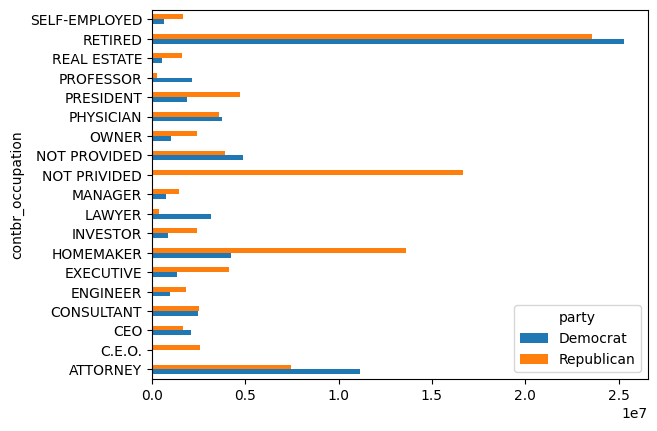

In [90]:
over_2mm.plot(kind='barh')

- Agrupando dados pelos nomes dos candidatos

In [91]:
def get_top_amounts(group, key, n=5):
    totals = group.groupby(key)['contb_receipt_amt'].sum()
    return totals.nlargest(n)

# fazendo uma agregação por profissão e por empregador
grouped = fec_mrbo.groupby('cand_nm')
o = grouped.apply(get_top_amounts, 'contbr_occupation', n=10) # Dados de profissão
o.unstack().T

cand_nm,"Obama, Barack","Romney, Mitt"
contbr_occupation,,
ATTORNEY,11141982.97,5364718.82
C.E.O.,NaN,1968386.11
CEO,2073284.79,NaN
CONSULTANT,2459912.71,1424894.01
EXECUTIVE,NaN,2300947.03
HOMEMAKER,4248875.80,8147446.22
INFORMATION REQUESTED,4866973.96,NaN
INFORMATION REQUESTED PER BEST EFFORTS,NaN,11396894.84
INVESTOR,NaN,1537595.12


In [92]:
e = grouped.apply(get_top_amounts, 'contbr_employer', n=10)
e.unstack().T

cand_nm,"Obama, Barack","Romney, Mitt"
contbr_employer,,
BARCLAYS CAPITAL,NaN,162750.00
CREDIT SUISSE,NaN,281150.00
GOLDMAN SACH & CO.,NaN,238250.00
H.I.G. CAPITAL,NaN,139500.00
HOMEMAKER,2605408.54,8147196.22
INFORMATION REQUESTED,5053480.37,NaN
INFORMATION REQUESTED PER BEST EFFORTS,NaN,12059527.24
MICROSOFT,215585.36,NaN
MORGAN STANLEY,NaN,267266.00


- Separando os valores das doações em buckets

In [93]:
bins = np.array([0, 1, 10, 100, 1000, 10000, 100000, 1000000, 10000000])
labels = pd.cut(fec_mrbo.contb_receipt_amt, bins)
labels

411         (10, 100]
412       (100, 1000]
413       (100, 1000]
414         (10, 100]
415         (10, 100]
             ...     
701381      (10, 100]
701382    (100, 1000]
701383        (1, 10]
701384      (10, 100]
701385    (100, 1000]
Name: contb_receipt_amt, Length: 694282, dtype: category
Categories (8, interval[int64, right]): [(0, 1] < (1, 10] < (10, 100] < (100, 1000] < (1000, 10000] < (10000, 100000] < (100000, 1000000] < (1000000, 10000000]]

- Agrupando os dados de Obama e Romney por nome e rótulo do comprimento a fim de obter histograma de acordo com o montante da doação

In [94]:
grouped = fec_mrbo.groupby(['cand_nm', labels])
bucket_sums = grouped.size().unstack().T
bucket_sums

cand_nm,"Obama, Barack","Romney, Mitt"
contb_receipt_amt,,
"(0, 1]",493,77
"(1, 10]",40070,3681
"(10, 100]",372280,31853
"(100, 1000]",153991,43357
"(1000, 10000]",22284,26186
"(10000, 100000]",2,1
"(100000, 1000000]",3,0
"(1000000, 10000000]",4,0


- Realizando a soma dos valores das contribuições e normalizando os buckets a fim de visualizar o percentual sobre o total de doações de cada montante por candidato

In [96]:
normed_sums = bucket_sums.div(bucket_sums.sum(axis='columns'), axis='index')
normed_sums

cand_nm,"Obama, Barack","Romney, Mitt"
contb_receipt_amt,,
"(0, 1]",0.864912,0.135088
"(1, 10]",0.915865,0.084135
"(10, 100]",0.921182,0.078818
"(100, 1000]",0.780302,0.219698
"(1000, 10000]",0.459748,0.540252
"(10000, 100000]",0.666667,0.333333
"(100000, 1000000]",1.000000,0.000000
"(1000000, 10000000]",1.000000,0.000000


<AxesSubplot: ylabel='contb_receipt_amt'>

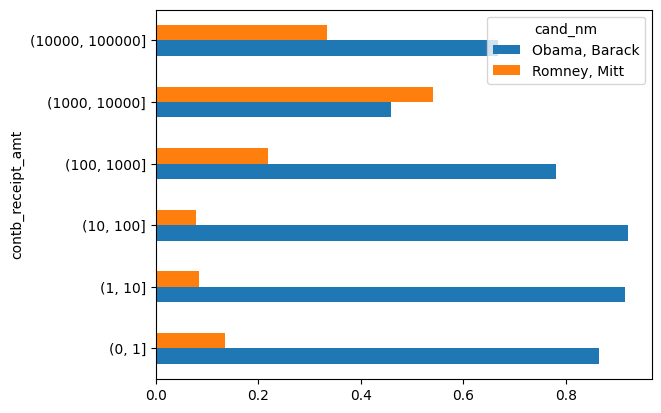

In [98]:
normed_sums[:-2].plot(kind='barh')

- Estatísticas sobre as doações conforme o estado

In [103]:
grouped = fec_mrbo.groupby(['cand_nm', 'contbr_st'])
totals = grouped.contb_receipt_amt.sum().unstack(0).fillna(0)
totals = totals[totals.sum(axis='columns') > 100000]
totals

cand_nm,"Obama, Barack","Romney, Mitt"
contbr_st,,
AK,281840.15,86204.24
AL,543123.48,527303.51
AR,359247.28,105556.00
AZ,1506476.98,1888436.23
CA,23824984.24,11237636.60
CO,2132429.49,1506714.12
CT,2068291.26,3499475.45
DC,4373538.80,1025137.50
DE,336669.14,82712.00


<AxesSubplot: ylabel='contbr_st'>

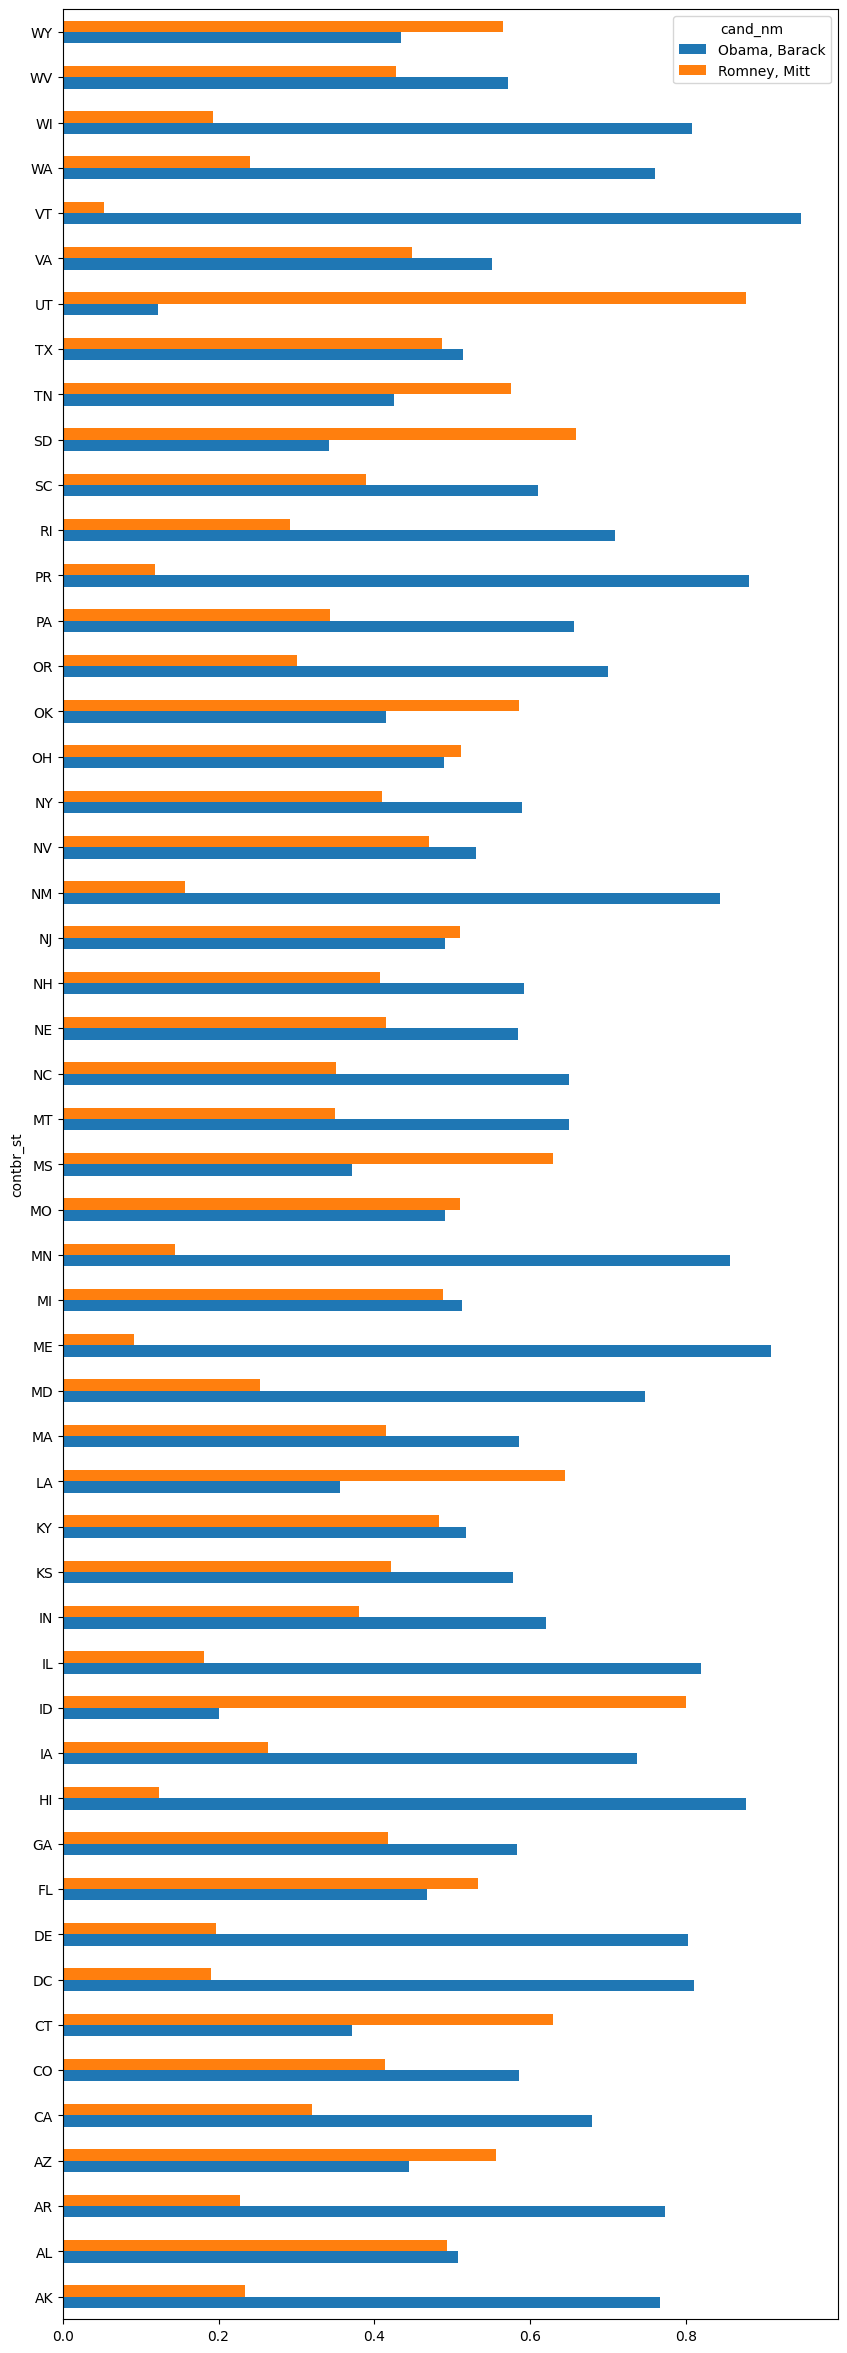

In [109]:
percent = totals.div(totals.sum(axis='columns'), axis='index')
percent.drop('XX').plot(figsize=(10, 30),kind='barh')